In [37]:
#import csv from the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
plt.style.use('ggplot')


df=pd.read_csv('../final.csv')
df[['SUB1','GENDER']].head()


,SUB1,GENDER
0,2,1
1,2,1
2,2,1
3,4,1
4,3,1


In [84]:
print df.memory_usage(index=True).sum()
import sys
print sys.getsizeof(df)

4516118264
4516118296


Chart for `DSM Diagnosis and Substance Abuse` part 1 (count)

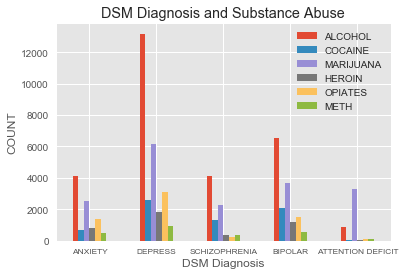

In [49]:
#DSMCRIT (later parts) and top 6 sub1
plt.figure()
df5 = df[df['SUB1'].isin([2,3,4,5,7,10])] #top 6 substances
df5 = df5[df5['DSMCRIT'].isin([14,15,16,17,18])] #

df5 = df5.groupby(['DSMCRIT'])['SUB1'].value_counts().unstack()#.reset_index(name="count")

df5.plot(kind='bar')
#print (df5.head(12))
#plt.title('Number of Substance by Year')

ax = plt.gca() # grab the current axis
ax.set(xlabel="DSM Diagnosis", ylabel="COUNT")
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["ANXIETY DISORDER","DEPRESSIVE DISORDER","SCHIZOPHRENIA","BIPOLAR DISORDER","ATTENTION DEFICIT"]) 
ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])
plt.title('DSM Diagnosis and Substance Abuse')
plt.show()

Chart for `DSM Diagnosis and Substance Abuse` part 2 (percentage)

SUB1      ALCOHOL   COCAINE  MARIJUANA    HEROIN   OPIATES      METH
DSMCRIT                                                             
14       0.412017  0.067358   0.252092  0.083998  0.137704  0.046831
15       0.472851  0.094097   0.221640  0.066427  0.111753  0.033232
16       0.473678  0.153544   0.261025  0.039136  0.029093  0.043523
17       0.419456  0.133815   0.236523  0.075945  0.097534  0.036727
18       0.192636  0.012053   0.728249  0.015341  0.028928  0.022792


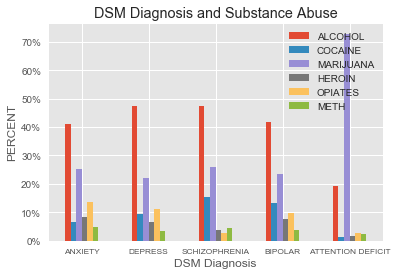

In [55]:
df6 = df5
print df6
df8 = df6
from matplotlib.ticker import FuncFormatter

plt.figure()


ax = df8.plot(kind='bar')
ax.legend(bbox_to_anchor=(1.2, 1.2))

#df6.groupby(['YEAR']).plot.bar(x='SUB1', y='count')
#df6.groupby(['YEAR','SUB1'])['SUB1'].sum().plot.bar()

ax = plt.gca() # grab the current axis
ax.set(xlabel="DSM Diagnosis", ylabel="PERCENT")
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

#df6.plot(kind='bar')
#pd.crosstab(df5['YEAR'],df5['SUB1']).plot.bar()
plt.title('DSM Diagnosis and Substance Abuse')
plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])
plt.show()

Chart for `Selected states and Substance Abuse` 

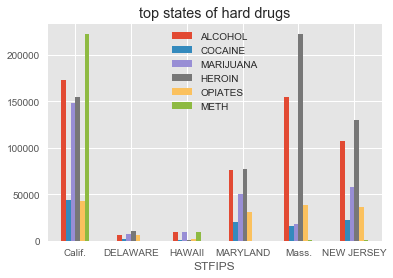

In [61]:
#ethnic and sub1
plt.figure()
#df5 = df[df['SUB1'].isin([2,5,4,10,7,3])] #top 6 substances in order
df5 = df[df['SUB1'].isin([2,3,4,5,7,10])] #top 6 substances

#df5 = df5[df5['STFIPS'].isin([36,6,25,39,8])] #5 most admitted states in order
df5 = df5[df5['STFIPS'].isin([6,10,15,24,25,34])] # most hard drugs state


df5 = df5.groupby(['STFIPS'])['SUB1'].value_counts().unstack()#.reset_index(name="count")

df5.plot(kind='bar')
#print (df5.head(12))
plt.title('top states of hard drugs')
ax = plt.gca() # grab the current axis
ax.set_xticklabels(["Calif.","DELAWARE","HAWAII","MARYLAND", "Mass.", "NEW JERSEY"]) 
#plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])

plt.show()

SUB1        2      3       4       5      7       10
STFIPS                                              
6       173237  43436  148616  155143  42454  222754
10        6589   1618    7074   10615   5944      44
15        9940    739    9801     648   1430    9989
24       75819  20353   50209   77764  30646     193
25      154398  16437   18075  221917  38045     450
34      107179  22066   58353  129669  36779     499
STFIPS
6     785640
10     31884
15     32547
24    254984
25    449322
34    354545
dtype: int64


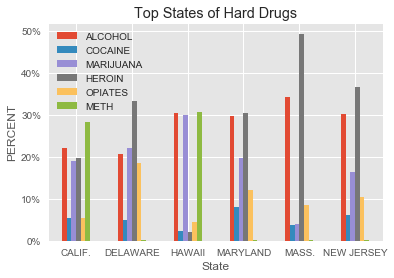

In [62]:
#top state of drugs part2(percentage)
df6 = df5
print df6
df7 = df6.sum(axis=1)
print df7
df8 = df6
for i in [2,5,4,10,7,3]:
    df8[i] = df6[i] / df7
    
from matplotlib.ticker import FuncFormatter

plt.figure()


ax = df8.plot(kind='bar')
ax.legend(bbox_to_anchor=(1.2, 1.2))

#df6.groupby(['YEAR']).plot.bar(x='SUB1', y='count')
#df6.groupby(['YEAR','SUB1'])['SUB1'].sum().plot.bar()

ax = plt.gca() # grab the current axis
ax.set(xlabel="State", ylabel="PERCENT")
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
ax.set_xticklabels(["CALIF.","DELAWARE","HAWAII","MARYLAND", "MASS.", "NEW JERSEY"]) 
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

#df6.plot(kind='bar')
#pd.crosstab(df5['YEAR'],df5['SUB1']).plot.bar()
plt.title('Top States of Hard Drugs')
#plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])
plt.show()

SUB1       2       3       4        5       7       10
RACE                                                  
2      121907    5484   28988    13040   14246   16661
4      627801  305726  506879   230799   35195   21703
5     2373708  263301  805797  1107423  735263  447750
13      20479    2604   10362     5831    2712   11488


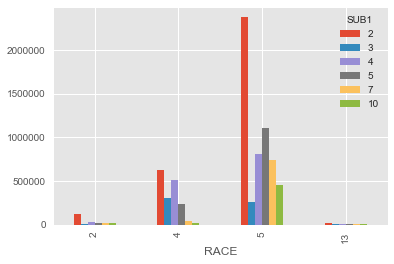

In [41]:
#race and sub1 part1
plt.figure()
df5 = df[df['SUB1'].isin([2,5,4,10,7,3])]
df5 = df5[df5['RACE'].isin([5,4,2,13])]

df5 = df5.groupby(['RACE'])['SUB1'].value_counts().unstack()#.reset_index(name="count")

df5.plot(kind='bar')
print (df5.head(12))
#plt.title('Number of Substance by Year')

#ax = plt.gca() # grab the current axis
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["12-14","18-20","25-29","35-39","45-49","55 AND OVER"]) 
plt.show()
# set the labels to display at those ticks

df6 = df5

In [42]:
print df6
df7 = df6.sum(axis=1)
print df7
df8 = df6
for i in [2,5,4,10,7,3]:
    df8[i] = df6[i] / df7
    
df8.rename(columns={2:'ALCOHOL', 5:'HEROIN', 4:'MARIJUANA', 10:'METH', 7:'OPIATES', 3:'COCAINE'},inplace=True)
#df8.rename(index={1:'MALE', 2:'FEMALE'},inplace=True)
print (df8)

SUB1       2       3       4        5       7       10
RACE                                                  
2      121907    5484   28988    13040   14246   16661
4      627801  305726  506879   230799   35195   21703
5     2373708  263301  805797  1107423  735263  447750
13      20479    2604   10362     5831    2712   11488
RACE
2      200326
4     1728103
5     5733242
13      53476
dtype: int64


In [53]:
print df8

SUB1      ALCOHOL   COCAINE  MARIJUANA    HEROIN   OPIATES      METH
DSMCRIT                                                             
14       0.412017  0.067358   0.252092  0.083998  0.137704  0.046831
15       0.472851  0.094097   0.221640  0.066427  0.111753  0.033232
16       0.473678  0.153544   0.261025  0.039136  0.029093  0.043523
17       0.419456  0.133815   0.236523  0.075945  0.097534  0.036727
18       0.192636  0.012053   0.728249  0.015341  0.028928  0.022792


Percentage Chart for `Race and Substance Abuse Problem`

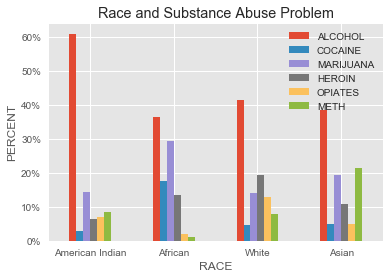

In [44]:
from matplotlib.ticker import FuncFormatter

plt.figure()

#df2['sub1_ratio'] = (df2.groupby(['YEAR'])['SUB1'] / df2.groupby(['YEAR']).sum())

ax = df8.plot(kind='bar')
ax.legend(bbox_to_anchor=(1.1, 1.1))

#df6.groupby(['YEAR']).plot.bar(x='SUB1', y='count')
#df6.groupby(['YEAR','SUB1'])['SUB1'].sum().plot.bar()

ax = plt.gca() # grab the current axis
ax.set(xlabel="RACE", ylabel="PERCENT")
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["ANXIETY DISORDER","DEPRESSIVE DISORDER","SCHIZOPHRENIA","BIPOLAR DISORDER","ATTENTION DEFICIT"]) 
#ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
ax.set_xticklabels(["American Indian","African","White","Asian"]) 
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

#df6.plot(kind='bar')
#pd.crosstab(df5['YEAR'],df5['SUB1']).plot.bar()
plt.title('Race and Substance Abuse Problem')
#plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])
plt.show()

In [45]:
#print df.query('STFIPS==39').query('DAYWAIT >= 365')[['DAYWAIT','CASEID']].head(5) #ohio = 39
#print df.query('STFIPS==39').query('DAYWAIT >= 900')[['DAYWAIT','CASEID']].head(5)

#employ and race
print df.query('RACE==2')['EMPLOY'].value_counts()#amercian indian
print df.query('RACE==5')['EMPLOY'].value_counts()#white
print df.query('RACE==4')['EMPLOY'].value_counts()#african

 3    96494
 4    68940
 1    22791
 2    14323
-9     3171
Name: EMPLOY, dtype: int64
 3    2364114
 4    2038904
 1    1010305
 2     480241
-9     126533
Name: EMPLOY, dtype: int64
 4    825362
 3    699713
 1    155909
 2     93617
-9     22269
Name: EMPLOY, dtype: int64


investigate unusual days waiting values

In [78]:
#print df.query('STFIPS==39').query('DAYWAIT >= 900')['DSMCRIT'].value_counts() #ohio = 39
#print df.query('STFIPS==39').query('DAYWAIT >= 90')['HLTHINS'].value_counts() #ohio = 39
#print df.query('STFIPS==39').query('DAYWAIT >= 90')['PRIMPAY'].value_counts() #ohio = 39
#c1 = df.query('DSMCRIT >= 0').query('STFIPS==11').query('DAYWAIT >= 0')['DSMCRIT'].count()
#print df.query('DSMCRIT >= 0').query('STFIPS==11').query('DAYWAIT >= 0')['DSMCRIT'].value_counts()/c1#ohio = 39
dsm_map = {4:'ALCOHOL DEPENDENCE', 5:'OPIOID DEPENDENCE', 7:'CANNABIS DEPENDENCE', 8:'OTHER SUBSTANCE DEPENDENCE', \
          9:'ALCOHOL ABUSE', 10:'CANNABIS ABUSE', 15:'DEPRESSIVE DISORDERS',\
           16:'SCHIZOPHRENIA', 17:'BIPOLAR DISORDERS'}
df11 = df.query('DSMCRIT >= 0')

print "ohio"
c2 = df11.query('STFIPS==39').query('DAYWAIT >= 365')['DSMCRIT'].count()
r2 = df11.query('STFIPS==39').query('DAYWAIT >= 365')['DSMCRIT'].value_counts() / c2 #ohio = 39
#r2['DSM Diagnosis'] = pd.Series(dsm_map)
print r2.head(5)

print "overall except ohio"
c3 = df11.query('STFIPS!=39').query('DAYWAIT >= 365')['DSMCRIT'].count()
r3 = df11.query('STFIPS!=39').query('DAYWAIT >= 365')['DSMCRIT'].value_counts() / c3 #ohio = 39
#r3['DSM Diagnosis'] = pd.Series(dsm_map)
print r3.head(5)

print "average patient"
c4 = df11.query('DAYWAIT >= 0')['DSMCRIT'].count()
r4 = df11.query('DAYWAIT >= 0')['DSMCRIT'].value_counts() / c4 #ohio = 39
#r3['DSM Diagnosis'] = pd.Series(dsm_map)
print r4.head(5)


ohio
5     0.319336
15    0.128909
4     0.120868
17    0.095214
16    0.092534
Name: DSMCRIT, dtype: float64
overall except ohio
10    0.191464
5     0.177126
4     0.159750
8     0.137146
7     0.103914
Name: DSMCRIT, dtype: float64
average patient
4    0.232056
5    0.202299
8    0.107657
7    0.097315
9    0.087174
Name: DSMCRIT, dtype: float64
